In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
POPULATION_DATA = pd.read_excel('population_data_SPPs_countries.xlsx')  
country_groupings = pd.read_excel('ssp uncertainty calculation.xlsx',sheet_name = 'Counry groupings RICE')
country_groupings_label = country_groupings.iloc[:,0:5]
country_groupings_label

,Country Name,Country Code,RICE code,RICE region,Short Name
0,Algeria,DZA,9.0,Africa,Africa
1,Angola,AGO,9.0,Africa,Africa
2,Benin,BEN,9.0,Africa,Africa
3,Botswana,BWA,9.0,Africa,Africa
4,Burkina Faso,BFA,9.0,Africa,Africa
...,...,...,...,...,...
195,American Samoa,ASM,1.0,US,US
196,Guam,GUM,1.0,US,US
197,United States,USA,1.0,US,US
198,NaN,NaN,NaN,NaN,NaN


In [60]:
full_data_set = pd.read_csv('SspDb_country_data_2013-06-12.csv')  
gdp_data = full_data_set[full_data_set["VARIABLE"] == 'GDP|PPP']
gdp_data_IIASA = gdp_data[gdp_data["MODEL"]=="IIASA GDP"]
gdp_data_IIASA = gdp_data_IIASA.iloc[:,:36]
gdp_data_IIASA = gdp_data_IIASA.rename(columns={'REGION': 'Country Code'})

#Check for missing countries
SSP1 = gdp_data_IIASA[gdp_data_IIASA["SCENARIO"]=="SSP1_v9_130219"]
SSP1["2010"].sum()

65019.98154480417

In [61]:
gdp_data_IIASA_labelled_rice = pd.merge(country_groupings_label, gdp_data_IIASA, on='Country Code')
SSP_GDP_RICE = gdp_data_IIASA_labelled_rice.groupby(["RICE region","SCENARIO"]).sum()
SSP_GDP_RICE = SSP_GDP_RICE.iloc[:, np.r_[:,13:32]]
SSP_GDP_RICE = SSP_GDP_RICE.transpose()

In [62]:
reorder = [ ('US', 'SSP1_v9_130219'),
 ('US', 'SSP2_v9_130219'),
 ('US', 'SSP3_v9_130219'),
 ('US', 'SSP4_v9_130219'),
 ('US', 'SSP5_v9_130219'),
 ('EU', 'SSP1_v9_130219'),
 ('EU', 'SSP2_v9_130219'),
 ('EU', 'SSP3_v9_130219'),
 ('EU', 'SSP4_v9_130219'),
 ('EU', 'SSP5_v9_130219'),
 ('Japan', 'SSP1_v9_130219'),
 ('Japan', 'SSP2_v9_130219'),
 ('Japan', 'SSP3_v9_130219'),
 ('Japan', 'SSP4_v9_130219'),
 ('Japan', 'SSP5_v9_130219'),
 ('Russia', 'SSP1_v9_130219'),
 ('Russia', 'SSP2_v9_130219'),
 ('Russia', 'SSP3_v9_130219'),
 ('Russia', 'SSP4_v9_130219'),
 ('Russia', 'SSP5_v9_130219'),
 ('Eurasia', 'SSP1_v9_130219'),
 ('Eurasia', 'SSP2_v9_130219'),
 ('Eurasia', 'SSP3_v9_130219'),
 ('Eurasia', 'SSP4_v9_130219'),
 ('Eurasia', 'SSP5_v9_130219'),
 ('China', 'SSP1_v9_130219'),
 ('China', 'SSP2_v9_130219'),
 ('China', 'SSP3_v9_130219'),
 ('China', 'SSP4_v9_130219'),
 ('China', 'SSP5_v9_130219'),
 ('India', 'SSP1_v9_130219'),
 ('India', 'SSP2_v9_130219'),
 ('India', 'SSP3_v9_130219'),
 ('India', 'SSP4_v9_130219'),
 ('India', 'SSP5_v9_130219'),
 ('MidEast', 'SSP1_v9_130219'),
 ('MidEast', 'SSP2_v9_130219'),
 ('MidEast', 'SSP3_v9_130219'),
 ('MidEast', 'SSP4_v9_130219'),
 ('MidEast', 'SSP5_v9_130219'),
 ('Africa', 'SSP1_v9_130219'),
 ('Africa', 'SSP2_v9_130219'),
 ('Africa', 'SSP3_v9_130219'),
 ('Africa', 'SSP4_v9_130219'),
 ('Africa', 'SSP5_v9_130219'),
 ('LatAm', 'SSP1_v9_130219'),
 ('LatAm', 'SSP2_v9_130219'),
 ('LatAm', 'SSP3_v9_130219'),
 ('LatAm', 'SSP4_v9_130219'),
 ('LatAm', 'SSP5_v9_130219'),
 ('Other High Income', 'SSP1_v9_130219'),
 ('Other High Income', 'SSP2_v9_130219'),
 ('Other High Income', 'SSP3_v9_130219'),
 ('Other High Income', 'SSP4_v9_130219'),
 ('Other High Income', 'SSP5_v9_130219'),
 ('OthAs', 'SSP1_v9_130219'),
 ('OthAs', 'SSP2_v9_130219'),
 ('OthAs', 'SSP3_v9_130219'),
 ('OthAs', 'SSP4_v9_130219'),
 ('OthAs', 'SSP5_v9_130219')]
           
SSP_GDP_RICE = SSP_GDP_RICE[reorder]
#df = df[['mean', '0', '1', '2', '3']]
SSP_GDP_RICE.to_excel("Y_Gross_ssp_full.xlsx") 


In [63]:
columns = list(SSP_GDP_RICE.columns.values)

<AxesSubplot:>

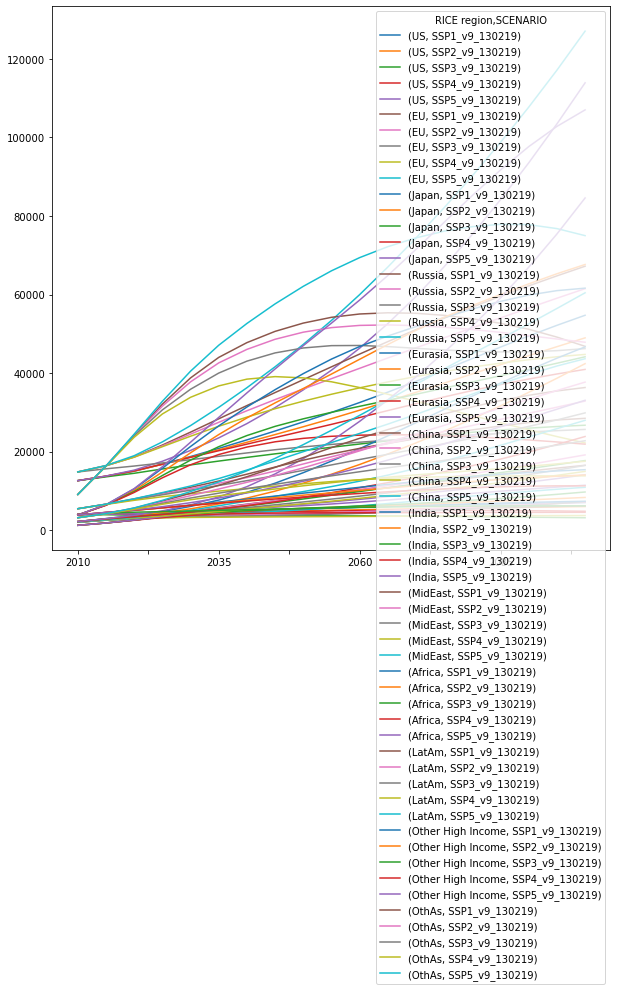

In [64]:
SSP_GDP_RICE.plot(subplots=False, figsize=(10, 10))

In [65]:
SPP_rates = [0.007,0.007,0.0035,0.0070,0.0105]

In [66]:
POPULATION_DATA = pd.read_excel('population_data_SPPs_countries.xlsx')  
country_groupings = pd.read_excel('ssp uncertainty calculation.xlsx',sheet_name = 'Counry groupings RICE')
country_groupings_label = country_groupings.iloc[:,0:5]
country_groupings_label

,Country Name,Country Code,RICE code,RICE region,Short Name
0,Algeria,DZA,9.0,Africa,Africa
1,Angola,AGO,9.0,Africa,Africa
2,Benin,BEN,9.0,Africa,Africa
3,Botswana,BWA,9.0,Africa,Africa
4,Burkina Faso,BFA,9.0,Africa,Africa
...,...,...,...,...,...
195,American Samoa,ASM,1.0,US,US
196,Guam,GUM,1.0,US,US
197,United States,USA,1.0,US,US
198,NaN,NaN,NaN,NaN,NaN


In [67]:
result = pd.merge(country_groupings_label, POPULATION_DATA, on='Country Code')

In [68]:
IIASA_pop = result[result["Model"] == "IIASA-WiC POP"]
IIASA_pop = IIASA_pop.groupby(["RICE region","Scenario"]).sum()
#IIASA_pop_SSP1 = IIASA_pop[IIASA_pop["Scenario"] == "SSP1"]
IIASA_pop =  IIASA_pop.groupby(["RICE region","Scenario"]).sum()

IIASA_pop_trans = IIASA_pop.transpose()
IIASA_pop_trans = IIASA_pop_trans[:-1]
IIASA_pop_trans = IIASA_pop_trans.iloc[1:,]

In [69]:
#re order population dataframe to match with PyRICE sequence
columns = list(IIASA_pop_trans.columns.values)

reorder = [('US', 'SSP1'),
 ('US', 'SSP2'),
 ('US', 'SSP3'),
 ('US', 'SSP4'),
 ('US', 'SSP5'),
 ('EU', 'SSP1'),
 ('EU', 'SSP2'),
 ('EU', 'SSP3'),
 ('EU', 'SSP4'),
 ('EU', 'SSP5'),
 ('Japan', 'SSP1'),
 ('Japan', 'SSP2'),
 ('Japan', 'SSP3'),
 ('Japan', 'SSP4'),
 ('Japan', 'SSP5'),
 ('Russia', 'SSP1'),
 ('Russia', 'SSP2'),
 ('Russia', 'SSP3'),
 ('Russia', 'SSP4'),
 ('Russia', 'SSP5'),
 ('Eurasia', 'SSP1'),
 ('Eurasia', 'SSP2'),
 ('Eurasia', 'SSP3'),
 ('Eurasia', 'SSP4'),
 ('Eurasia', 'SSP5'),
 ('China', 'SSP1'),
 ('China', 'SSP2'),
 ('China', 'SSP3'),
 ('China', 'SSP4'),
 ('China', 'SSP5'),
 ('India', 'SSP1'),
 ('India', 'SSP2'),
 ('India', 'SSP3'),
 ('India', 'SSP4'),
 ('India', 'SSP5'),
 ('MidEast', 'SSP1'),
 ('MidEast', 'SSP2'),
 ('MidEast', 'SSP3'),
 ('MidEast', 'SSP4'),
 ('MidEast', 'SSP5'),
 ('Africa', 'SSP1'),
 ('Africa', 'SSP2'),
 ('Africa', 'SSP3'),
 ('Africa', 'SSP4'),
 ('Africa', 'SSP5'),
 ('LatAm', 'SSP1'),
 ('LatAm', 'SSP2'),
 ('LatAm', 'SSP3'),
 ('LatAm', 'SSP4'),
 ('LatAm', 'SSP5'),
 ('Other High Income', 'SSP1'),
 ('Other High Income', 'SSP2'),
 ('Other High Income', 'SSP3'),
 ('Other High Income', 'SSP4'),
 ('Other High Income', 'SSP5'),
 ('OthAs', 'SSP1'),
 ('OthAs', 'SSP2'),
 ('OthAs', 'SSP3'),
 ('OthAs', 'SSP4'),
 ('OthAs', 'SSP5')]

IIASA_pop_trans = IIASA_pop_trans[reorder]
#df = df[['mean', '0', '1', '2', '3']]
IIASA_pop_trans.to_excel("pop_ssp.xlsx") 